In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def construct(n: int):
    diag = np.diag([2] * n, 0)
    non_diag = np.diag([1] * (n - 1), -1)    
    return diag + non_diag + non_diag.T

In [3]:
def QR(A: np.ndarray, eps: float = 1e-8, max_iter: int = 10000):
    A_ = A.copy()
    evals = np.zeros(shape=(A_.shape[0]))

    log = ([], [], [])
    
    for i in range(max_iter):
        q, r = np.linalg.qr(A_)
        A_ = r @ q

        evals_, evals = evals, np.diag(A_)

        log[0].append(i)
        log[1].append(np.min(evals))
        log[2].append(np.max(evals))

        if np.linalg.norm(evals_ - evals) <= eps:
            break

    return evals, log

In [4]:
n = 10
A = construct(n)
nump = np.sort(np.linalg.eigvals(A))[::-1]
my = np.sort(QR(A)[0])[::-1]
print("Simple test")
print("Error =", np.linalg.norm(my - nump))

Simple test
Error = 7.020554004197509e-08


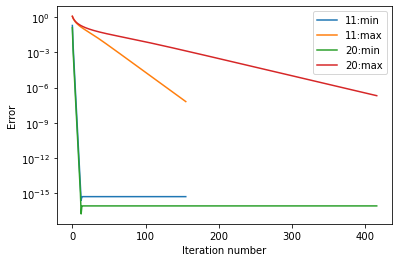

In [5]:
for n in (11, 20):
    A = construct(n)
    nump = np.linalg.eigvals(A)
    min_true = np.min(nump)
    max_true = np.max(nump)
    _, log = QR(A)
    plt.plot(log[0], np.abs(log[1] - min_true), label=f"{n}:min")
    plt.plot(log[0], np.abs(log[2] - max_true), label=f"{n}:max")
    plt.yscale("log")

plt.xlabel("Iteration number")
plt.ylabel("Error")
plt.legend()
plt.show()

Из графика видно, что остановка алгоритма, по крайней мере при использовании самого наивного способа выхода из алгоритма по длине разности векторов собственных значений между соседними итерациями, в основном величиной наибольшего собственного числа матрицы $A$.

$\log y = ak + c \Longrightarrow r_k = y = \widetilde{c}\exp ak$, где $a < 0, \widetilde{c} \geq 1$

Теперь рассмотрим по тесту отношений:

$\frac{r_{k+1}}{r_k} = \exp a < 1 \Longrightarrow $ сходимость линейная.